El dataset que utilizaran contiene extractos de poemas/historias creadas por 3 reconocidos autores

- Mary Shelley: Autora de "Frankenstein"

- Edgar Allan Poe: Autor de Poemas como "El Cuervo"

- HP Lovecraft: Autor de libros como "El Necronomicon"

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
%matplotlib inline

from nltk import word_tokenize, ngrams



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
#1. Crear grafico de barras con el numero de muestras para cada autor
df = pd.read_csv('/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/authors_examen.csv')
df = df[['author', 'text']]
df = df.dropna()
df['author'].unique()

array(['Edgar Allan Poe', 'HP Lovecraft', 'Mary Shelley'], dtype=object)

<Axes: xlabel='author'>

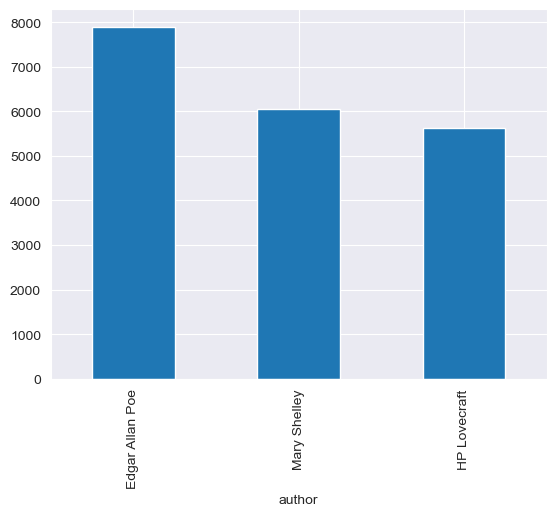

In [57]:
#1. Crear grafico de barras con el numero de muestras para cada autor
df['author'].value_counts().plot(kind='bar')


In [50]:
# Poner un comentario sobre el balance/desbalance de los datos. Existe alguna categoria sobre/sub representada? Como podria afectar esto al entrenamiento? (Profundizar en su respuesta)

Podemos observar que el dataset tiene un balance aceptable entre las 3 clases, sin embargo, la clase de Edgar Allan Poe tiene un poco más de muestras que las otras dos clases. Esto podría afectar el entrenamiento del modelo, ya que podría aprender a predecir mejor la clase con más muestras y tener un rendimiento inferior en las clases con menos muestras. Para mitigar este problema, se podrían aplicar técnicas de balanceo de datos, como el sobremuestreo o submuestreo, o utilizar técnicas de ajuste de pesos en el modelo. Otra opción sería utilizar técnicas de ponderación de clases en la función de pérdida del modelo, para que el modelo preste más atención a las clases menos representadas.

In [60]:
#Crear graficos de barras para cada autor. Los graficos de barras deberan mostrar unigramas, bigramas, trigramas y n-gramas=4 (tetragramas?)
def generar_texto_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    n_gram_strings = [' '.join(gram) for gram in n_grams]
    return " ".join(n_gram_strings)
def contar_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)
def graficar_ngrams(ngrams_counter, titulo):
    ngrams_df = pd.DataFrame(ngrams_counter.most_common(10), columns=['n-gram', 'count'])
    ngrams_df['n-gram'] = ngrams_df['n-gram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10, 6))
    # Actualización para quitar la advertencia
    sns.barplot(x='count', y='n-gram', hue='n-gram', data=ngrams_df, legend=False)
    plt.title(titulo)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.tight_layout()  # Mejora la visualización
    plt.show()


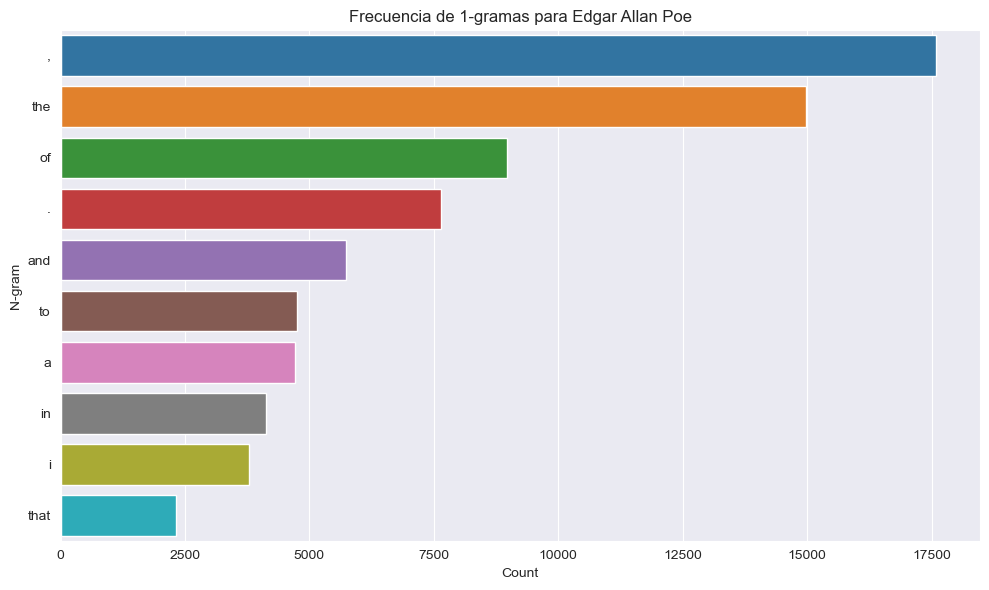

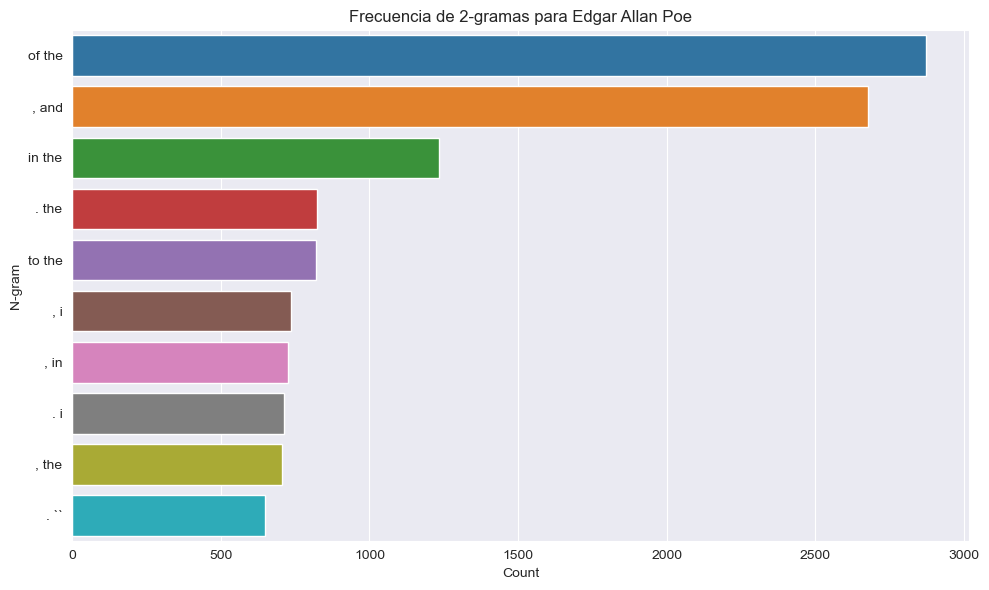

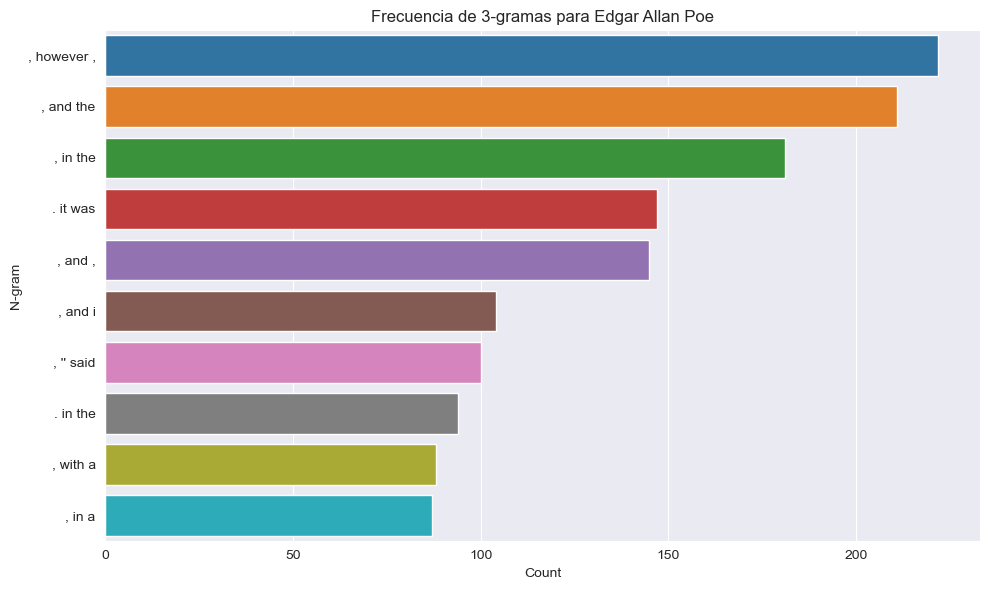

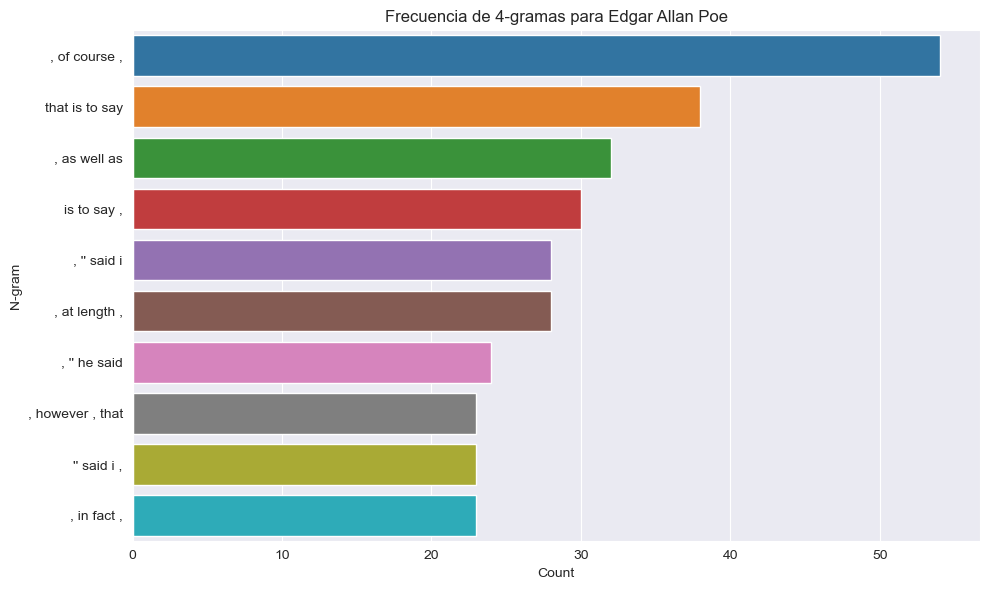

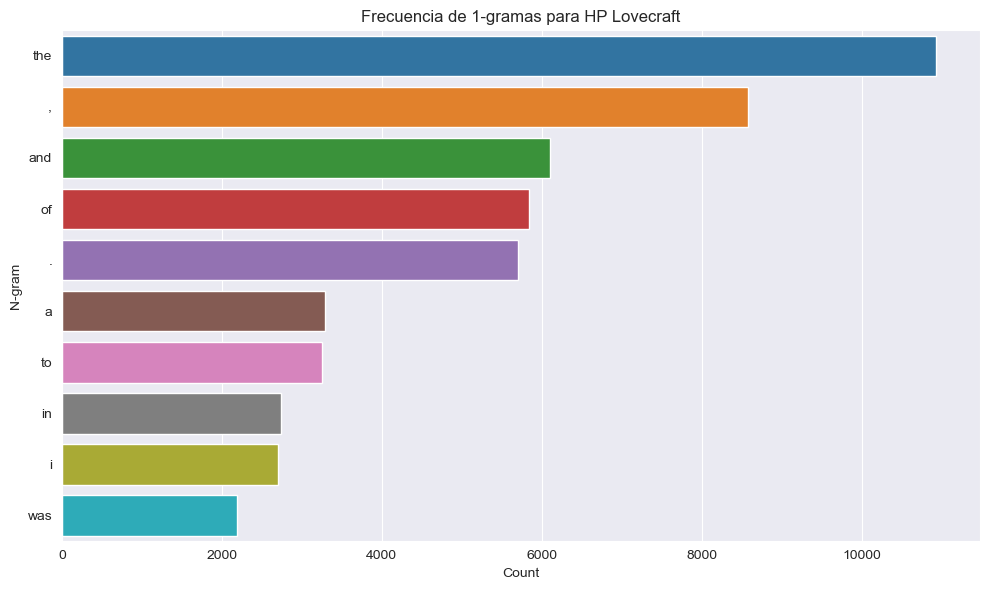

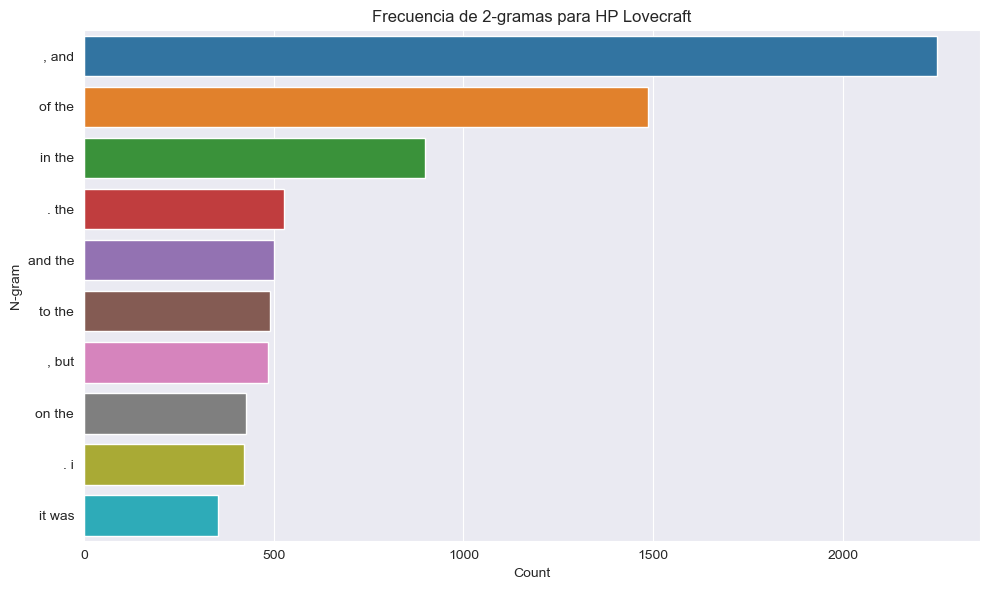

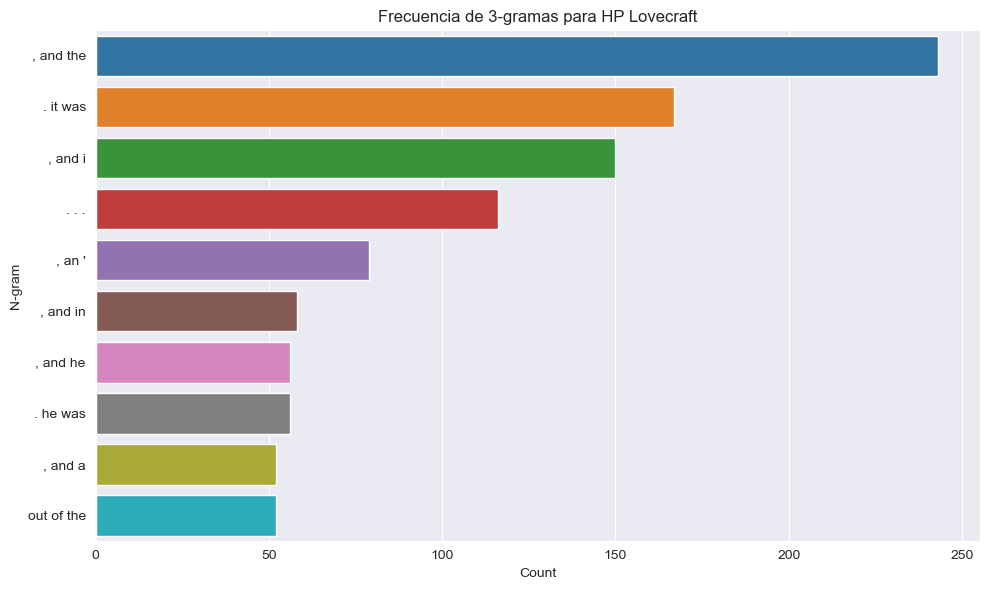

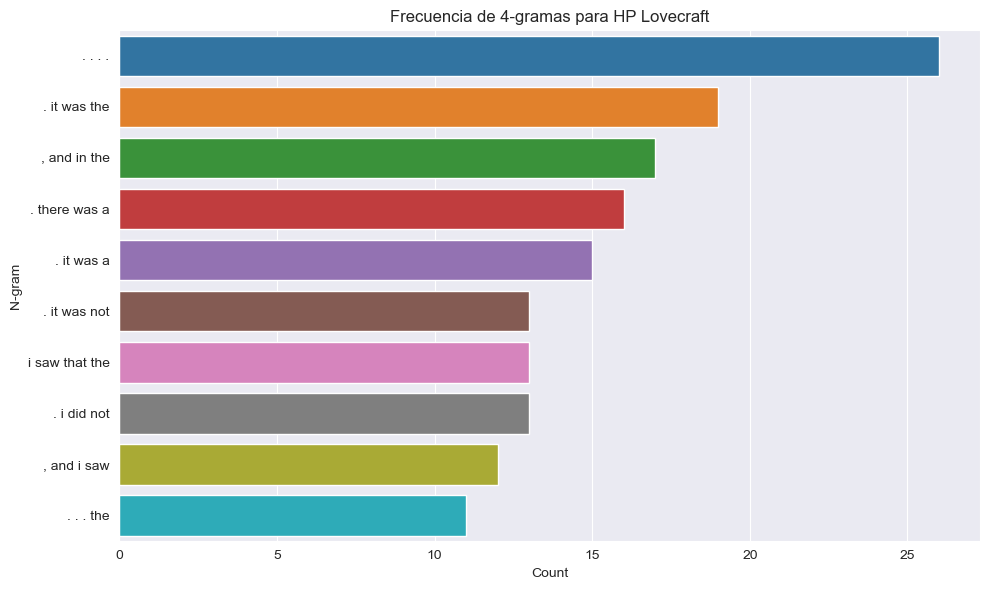

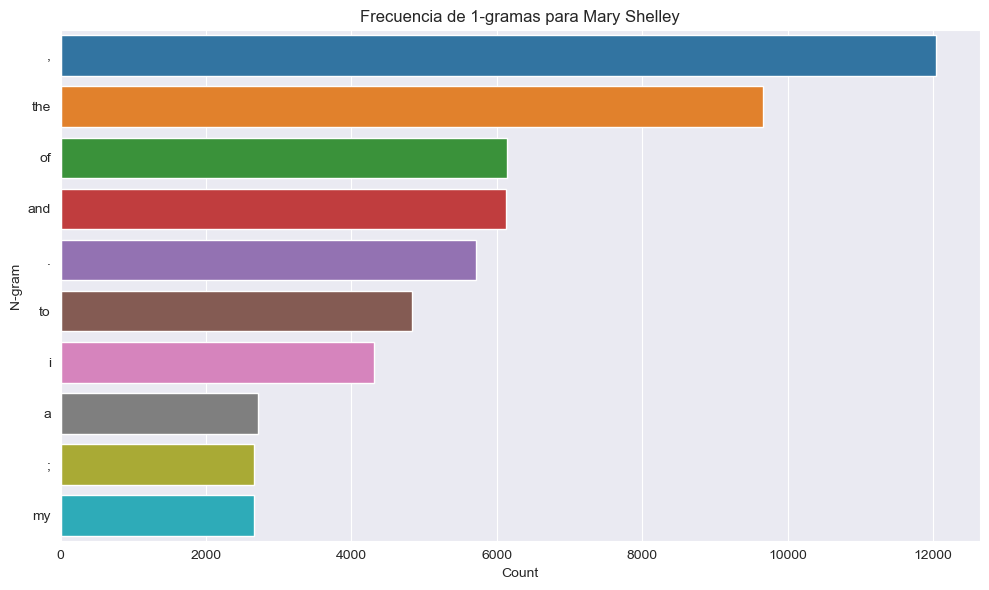

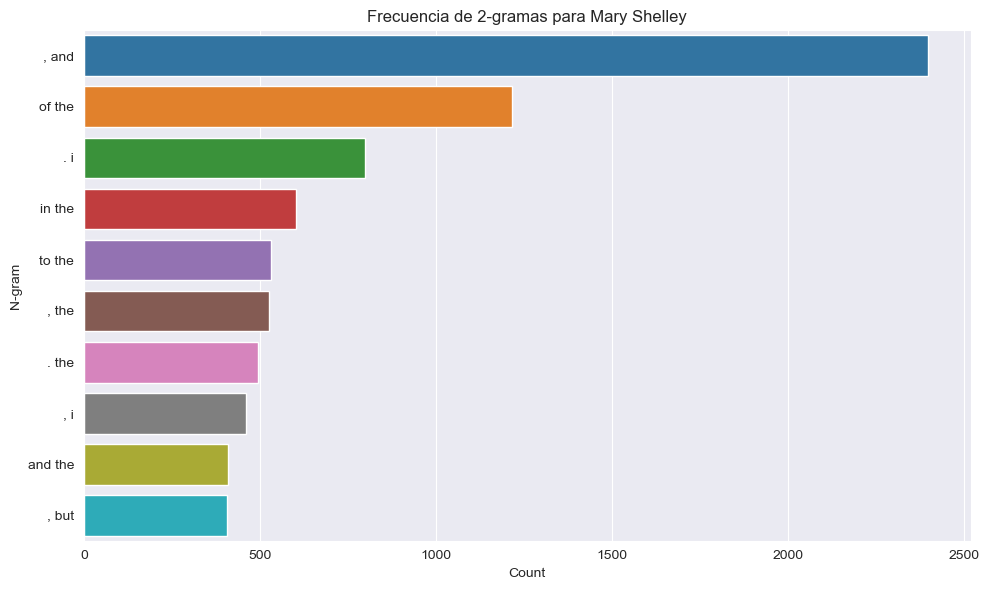

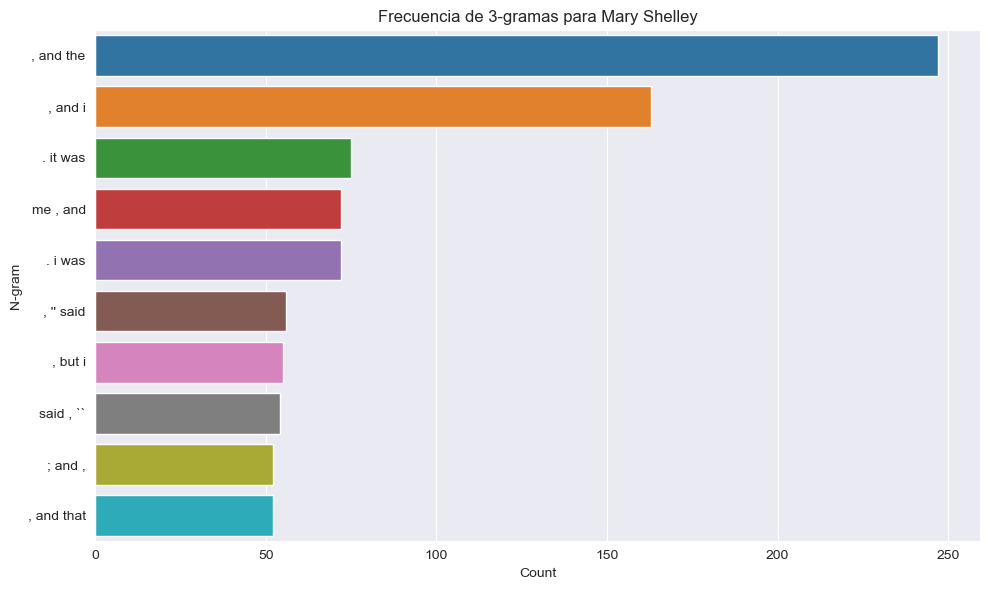

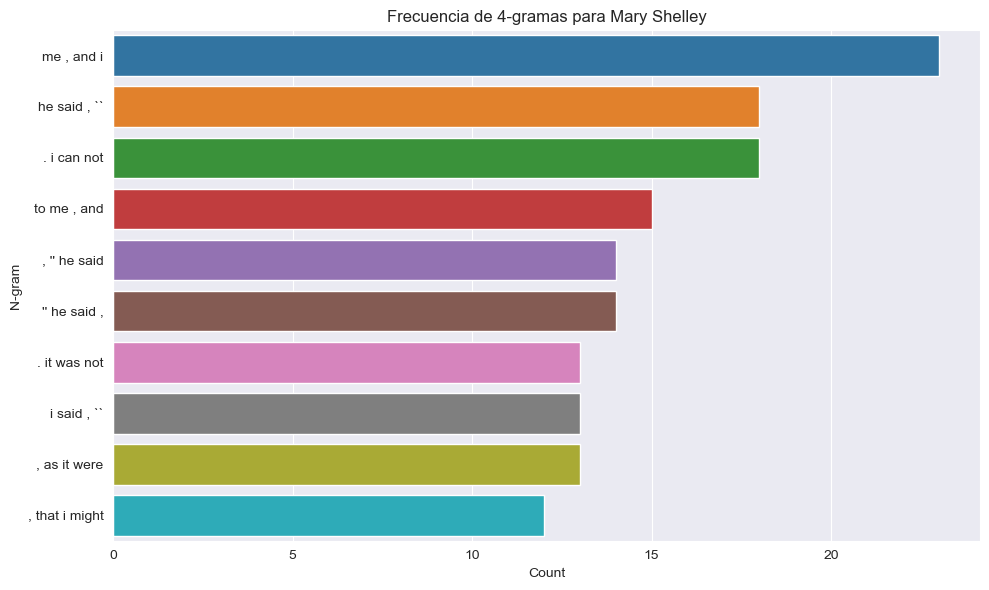

In [61]:
# Lista de autores
autores = df['author'].unique()

# Generar gráficos de barras para cada autor
for autor in autores:
    # Filtrar textos por autor
    texto_autor = ' '.join(df[df['author'] == autor]['text'])

    # Para cada n-grama (1 a 4)
    for n in range(1, 5):
        # Contar los n-gramas
        ngrams_counter = contar_ngrams(texto_autor, n)

        # Graficar los resultados
        graficar_ngrams(ngrams_counter, f'Frecuencia de {n}-gramas para {autor}')